In [1]:
from __future__ import print_function
import madmom as mmm
from miran import *
from subprocess import call
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets

In [2]:
#nnlss = folderfiles('/Users/angel/Insync/Datasets/giantsteps/splits/nnls', ext='.nnls')
nnlss = folderfiles('/Users/angel/Desktop/ns/', ext='.nnls')
truth = folderfiles('/Users/angel/Insync/Datasets/giantsteps/keys_v2', ext='.txt')

In [3]:
filename = []
meanchroma = []
gkey = []

for f in nnlss:
    sf = strip_filename(f)
    
    find_annotation = 0
    
    for ff in truth:
        sff = strip_filename(ff)
        
        if sff == sf[:sf.rfind(' - ')]:
            
            find_annotation = 1
            
            with open(ff, 'r') as estkey:
                gkey.append(estkey.read())
                
    if find_annotation == 0:
        print("COULD NOT FIND ANNOTATION FOR {}".format(sf))
            
    temp = pd.DataFrame(csv_to_numpy2(f))
    meanchroma.append(np.roll(temp.median(), -3)) # Shift it so that vector indexes correspond to pitch classes.
    filename.append(sf)    

In [4]:
# CREATE A PD DATAFRAME WITH THE RESULTS, AND SAVE IT TO DISK
output_df = pd.DataFrame(meanchroma, index=filename)
output_df['gkey'] = gkey
# df_to_excel(output_df, '/Users/angel/Desktop/nnnssss')

In [ ]:
output_df[output_df.gkey == 'Eb major ']

In [ ]:
print output_df.iloc[11]
plt.plot(output_df.iloc[11][:-1])

In [23]:
n_neighbors = 5

X = output_df.drop('gkey', axis=1)
y = output_df.gkey

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X.as_matrix(), y.as_matrix())
clf.score(X,y)

1.0

['E major']


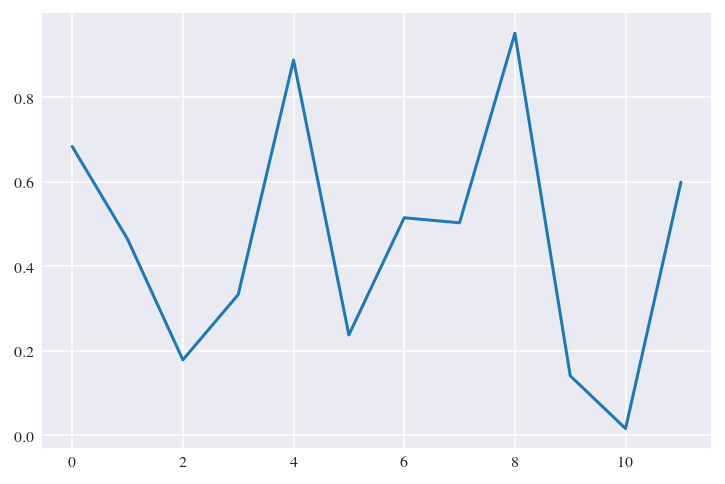

In [26]:
z = np.random.random(12)
print(clf.predict(z.reshape(1, -1)))
plt.plot(z)

In [27]:
clf.kneighbors([z])

(array([[ 1.18470803]]), array([[33]]))

In [ ]:
test = output_df.iloc[11][:-1].as_matrix()
test.reshape(1, -1)

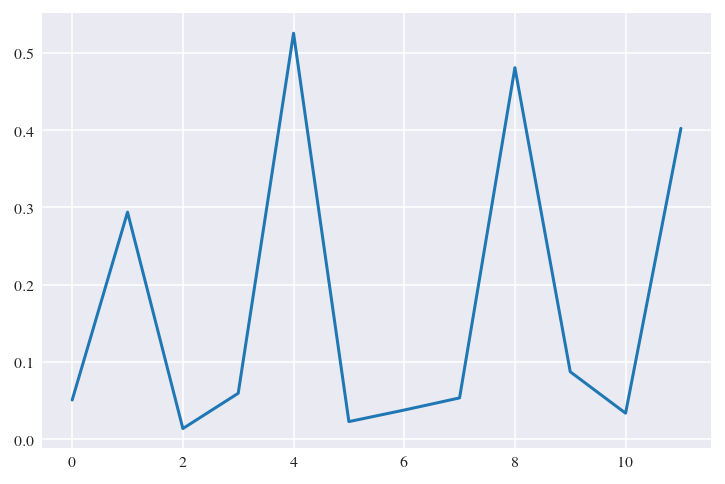

In [33]:
plt.plot(X.as_matrix()[33])

In [12]:
clf.score(X, y)

0.88888888888888884